In [93]:
!pip install WunderWeather 
!pip install arrow
import arrow 
from WunderWeather import weather 
import pandas as pd
import datetime 
import numpy as np
import json
import requests as req
from datetime import date
import matplotlib.pyplot as plt
import calendar
import csv
from scipy.stats import linregress


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
#import data



uber_july_raw = "uber-raw-data-jul14.csv"



uber_aug_raw = "uber-raw-data-aug14.csv"



uber_sep_raw = "uber-raw-data-sep14.csv"

lyft_data_raw = pd.read_csv("Lyft_July-Sep.csv")

lyft_data_raw.head()

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN


In [3]:
uber_july_raw1 = pd.read_csv(uber_july_raw)
uber_july_raw1.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [4]:
uber_aug_raw2 = pd.read_csv(uber_aug_raw)
uber_aug_raw2.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [5]:
uber_sep_raw3 = pd.read_csv(uber_sep_raw)
uber_sep_raw3.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [6]:
# Union 3 uber datasets together

uber_july_aug = uber_july_raw1.append(uber_aug_raw2)
uber_data_raw = uber_july_aug.append(uber_sep_raw3)
#uber_test = uber_data_raw.sample(1000)
#uber_test["Date/Time"]
uber_data_raw
#uber_data_raw.get(2644)

#Rename 'name' to 'school'
Date_Time = uber_data_raw.rename(columns={"Date/Time": "Date and Time"})
Date_Time

,Date and Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [7]:
#Date_Time["Clean_Date"] = pd.to_datetime(Date_Time["Date and Time"], format="%m/%d/%Y, %H").dt.date

In [8]:
#groupby_date = uber_data_raw.groupby("Date and Time")
#groupby_date = uber_data_raw.groupby("Date_Time")
#average_temp = groupby_date["New_Temp"].mean()

#print(groupby_date)

In [9]:

api_key = 'eecb5b08f6a80017'
extractor = weather.Extract('eecb5b08f6a80017')
#zip = '02481'
location = 'NY/New York'
dates=[]
temps=[]
dict={}

begin_date = arrow.get("201407","YYYYMM")
end_date = arrow.get("201410","YYYYMM").shift(days=-1)
for date in arrow.Arrow.range('day',begin_date,end_date):
  
  date_weather = extractor.date(location,date.format('YYYYMMDD'))

 
  for observation in date_weather.observations:
    date=observation.date_pretty
    
    dates.append(date)
    
    temp=observation.temp_f
    temps.append(temp)
    print("Date:",observation.date_pretty)
    print("Temp:",observation.temp_f)
    
    
    dict["dates"]=dates
    dict["temps"]=temps
    
    


Date: 12:51 AM EDT on July 01, 2014
Temp: 75.0
Date: 1:51 AM EDT on July 01, 2014
Temp: 75.0
Date: 2:51 AM EDT on July 01, 2014
Temp: 73.9
Date: 3:51 AM EDT on July 01, 2014
Temp: 73.0
Date: 4:51 AM EDT on July 01, 2014
Temp: 73.0
Date: 5:51 AM EDT on July 01, 2014
Temp: 72.0
Date: 6:51 AM EDT on July 01, 2014
Temp: 73.9
Date: 7:51 AM EDT on July 01, 2014
Temp: 75.0
Date: 8:51 AM EDT on July 01, 2014
Temp: 75.9
Date: 9:51 AM EDT on July 01, 2014
Temp: 79.0
Date: 10:51 AM EDT on July 01, 2014
Temp: 82.0
Date: 11:51 AM EDT on July 01, 2014
Temp: 86.0
Date: 12:51 PM EDT on July 01, 2014
Temp: 87.1
Date: 1:51 PM EDT on July 01, 2014
Temp: 88.0
Date: 2:51 PM EDT on July 01, 2014
Temp: 84.9
Date: 3:51 PM EDT on July 01, 2014
Temp: 86.0
Date: 4:51 PM EDT on July 01, 2014
Temp: 84.0
Date: 5:51 PM EDT on July 01, 2014
Temp: 84.9
Date: 6:51 PM EDT on July 01, 2014
Temp: 84.0
Date: 7:51 PM EDT on July 01, 2014
Temp: 82.9
Date: 8:51 PM EDT on July 01, 2014
Temp: 82.0
Date: 9:51 PM EDT on July 01, 

Date: 12:51 AM EDT on July 07, 2014
Temp: 73.9
Date: 1:51 AM EDT on July 07, 2014
Temp: 73.9
Date: 2:51 AM EDT on July 07, 2014
Temp: 73.0
Date: 3:51 AM EDT on July 07, 2014
Temp: 73.0
Date: 4:51 AM EDT on July 07, 2014
Temp: 73.0
Date: 5:51 AM EDT on July 07, 2014
Temp: 72.0
Date: 6:51 AM EDT on July 07, 2014
Temp: 73.0
Date: 7:51 AM EDT on July 07, 2014
Temp: 73.0
Date: 8:51 AM EDT on July 07, 2014
Temp: 75.9
Date: 9:51 AM EDT on July 07, 2014
Temp: 79.0
Date: 10:51 AM EDT on July 07, 2014
Temp: 81.0
Date: 11:51 AM EDT on July 07, 2014
Temp: 84.9
Date: 12:51 PM EDT on July 07, 2014
Temp: 87.1
Date: 1:51 PM EDT on July 07, 2014
Temp: 88.0
Date: 2:51 PM EDT on July 07, 2014
Temp: 88.0
Date: 3:51 PM EDT on July 07, 2014
Temp: 88.0
Date: 4:51 PM EDT on July 07, 2014
Temp: 90.0
Date: 5:51 PM EDT on July 07, 2014
Temp: 87.1
Date: 6:51 PM EDT on July 07, 2014
Temp: 88.0
Date: 7:51 PM EDT on July 07, 2014
Temp: 86.0
Date: 8:51 PM EDT on July 07, 2014
Temp: 84.9
Date: 9:51 PM EDT on July 07, 

Date: 12:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 1:51 AM EDT on July 14, 2014
Temp: 69.8
Date: 2:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 3:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 4:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 5:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 6:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 7:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 8:51 AM EDT on July 14, 2014
Temp: 71.6
Date: 9:51 AM EDT on July 14, 2014
Temp: 73.4
Date: 10:51 AM EDT on July 14, 2014
Temp: 75.2
Date: 11:51 AM EDT on July 14, 2014
Temp: 77.0
Date: 12:51 PM EDT on July 14, 2014
Temp: 79.0
Date: 1:51 PM EDT on July 14, 2014
Temp: 81.0
Date: 2:51 PM EDT on July 14, 2014
Temp: 82.0
Date: 3:16 PM EDT on July 14, 2014
Temp: 82.0
Date: 3:51 PM EDT on July 14, 2014
Temp: 82.9
Date: 4:51 PM EDT on July 14, 2014
Temp: 81.0
Date: 5:51 PM EDT on July 14, 2014
Temp: 79.0
Date: 6:51 PM EDT on July 14, 2014
Temp: 78.1
Date: 7:03 PM EDT on July 14, 2014
Temp: 75.0
Date: 7:11 PM EDT on July 14, 

Date: 12:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 1:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 2:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 3:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 4:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 5:51 AM EDT on July 19, 2014
Temp: 68.0
Date: 6:51 AM EDT on July 19, 2014
Temp: 68.0
Date: 7:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 8:51 AM EDT on July 19, 2014
Temp: 69.8
Date: 9:51 AM EDT on July 19, 2014
Temp: 73.0
Date: 10:51 AM EDT on July 19, 2014
Temp: 75.0
Date: 11:51 AM EDT on July 19, 2014
Temp: 75.0
Date: 12:51 PM EDT on July 19, 2014
Temp: 75.9
Date: 1:51 PM EDT on July 19, 2014
Temp: 75.2
Date: 2:51 PM EDT on July 19, 2014
Temp: 75.2
Date: 3:51 PM EDT on July 19, 2014
Temp: 73.4
Date: 4:51 PM EDT on July 19, 2014
Temp: 75.2
Date: 5:51 PM EDT on July 19, 2014
Temp: 75.2
Date: 7:51 PM EDT on July 19, 2014
Temp: 73.4
Date: 8:51 PM EDT on July 19, 2014
Temp: 71.6
Date: 9:51 PM EDT on July 19, 2014
Temp: 69.8
Date: 11:51 PM EDT on July 19,

Date: 12:51 AM EDT on July 27, 2014
Temp: 73.9
Date: 1:51 AM EDT on July 27, 2014
Temp: 73.0
Date: 2:51 AM EDT on July 27, 2014
Temp: 72.0
Date: 3:51 AM EDT on July 27, 2014
Temp: 72.0
Date: 4:40 AM EDT on July 27, 2014
Temp: 72.0
Date: 4:48 AM EDT on July 27, 2014
Temp: 71.6
Date: 4:51 AM EDT on July 27, 2014
Temp: 72.0
Date: 5:51 AM EDT on July 27, 2014
Temp: 73.0
Date: 6:51 AM EDT on July 27, 2014
Temp: 72.0
Date: 7:51 AM EDT on July 27, 2014
Temp: 73.0
Date: 8:51 AM EDT on July 27, 2014
Temp: 73.9
Date: 9:51 AM EDT on July 27, 2014
Temp: 75.9
Date: 10:51 AM EDT on July 27, 2014
Temp: 77.0
Date: 11:51 AM EDT on July 27, 2014
Temp: 78.1
Date: 12:51 PM EDT on July 27, 2014
Temp: 79.0
Date: 1:51 PM EDT on July 27, 2014
Temp: 80.6
Date: 2:51 PM EDT on July 27, 2014
Temp: 84.0
Date: 3:51 PM EDT on July 27, 2014
Temp: 82.0
Date: 4:51 PM EDT on July 27, 2014
Temp: 82.9
Date: 5:51 PM EDT on July 27, 2014
Temp: 84.9
Date: 6:51 PM EDT on July 27, 2014
Temp: 84.9
Date: 7:51 PM EDT on July 27, 

Date: 12:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 1:51 AM EDT on August 03, 2014
Temp: 68.0
Date: 2:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 3:09 AM EDT on August 03, 2014
Temp: 66.0
Date: 3:38 AM EDT on August 03, 2014
Temp: 66.0
Date: 3:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 4:03 AM EDT on August 03, 2014
Temp: 66.0
Date: 4:23 AM EDT on August 03, 2014
Temp: 66.0
Date: 4:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 5:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 6:51 AM EDT on August 03, 2014
Temp: 66.0
Date: 7:11 AM EDT on August 03, 2014
Temp: 66.0
Date: 7:43 AM EDT on August 03, 2014
Temp: 66.9
Date: 7:47 AM EDT on August 03, 2014
Temp: 66.2
Date: 7:51 AM EDT on August 03, 2014
Temp: 66.9
Date: 8:28 AM EDT on August 03, 2014
Temp: 66.9
Date: 8:40 AM EDT on August 03, 2014
Temp: 66.9
Date: 8:45 AM EDT on August 03, 2014
Temp: 66.2
Date: 8:51 AM EDT on August 03, 2014
Temp: 66.9
Date: 8:59 AM EDT on August 03, 2014
Temp: 66.9
Date: 9:06 AM EDT on August 03, 2014
Te

Date: 12:51 AM EDT on August 09, 2014
Temp: 72.0
Date: 1:51 AM EDT on August 09, 2014
Temp: 70.0
Date: 2:51 AM EDT on August 09, 2014
Temp: 68.0
Date: 3:51 AM EDT on August 09, 2014
Temp: 68.0
Date: 4:51 AM EDT on August 09, 2014
Temp: 68.0
Date: 5:51 AM EDT on August 09, 2014
Temp: 66.9
Date: 6:51 AM EDT on August 09, 2014
Temp: 68.0
Date: 7:51 AM EDT on August 09, 2014
Temp: 70.0
Date: 8:51 AM EDT on August 09, 2014
Temp: 73.0
Date: 9:51 AM EDT on August 09, 2014
Temp: 75.0
Date: 10:51 AM EDT on August 09, 2014
Temp: 78.1
Date: 11:51 AM EDT on August 09, 2014
Temp: 82.0
Date: 12:51 PM EDT on August 09, 2014
Temp: 82.9
Date: 1:51 PM EDT on August 09, 2014
Temp: 84.9
Date: 2:51 PM EDT on August 09, 2014
Temp: 86.0
Date: 3:51 PM EDT on August 09, 2014
Temp: 84.0
Date: 4:51 PM EDT on August 09, 2014
Temp: 82.9
Date: 5:51 PM EDT on August 09, 2014
Temp: 82.9
Date: 6:51 PM EDT on August 09, 2014
Temp: 81.0
Date: 7:51 PM EDT on August 09, 2014
Temp: 79.0
Date: 8:51 PM EDT on August 09, 2014

Date: 12:51 AM EDT on August 15, 2014
Temp: 66.9
Date: 1:51 AM EDT on August 15, 2014
Temp: 66.0
Date: 2:51 AM EDT on August 15, 2014
Temp: 64.0
Date: 3:51 AM EDT on August 15, 2014
Temp: 64.0
Date: 4:51 AM EDT on August 15, 2014
Temp: 63.0
Date: 5:51 AM EDT on August 15, 2014
Temp: 61.0
Date: 6:51 AM EDT on August 15, 2014
Temp: 61.0
Date: 7:51 AM EDT on August 15, 2014
Temp: 62.1
Date: 8:51 AM EDT on August 15, 2014
Temp: 64.9
Date: 9:51 AM EDT on August 15, 2014
Temp: 68.0
Date: 10:51 AM EDT on August 15, 2014
Temp: 69.8
Date: 11:51 AM EDT on August 15, 2014
Temp: 73.0
Date: 12:51 PM EDT on August 15, 2014
Temp: 71.1
Date: 1:51 PM EDT on August 15, 2014
Temp: 71.1
Date: 2:51 PM EDT on August 15, 2014
Temp: 70.0
Date: 3:51 PM EDT on August 15, 2014
Temp: 70.0
Date: 4:51 PM EDT on August 15, 2014
Temp: 70.0
Date: 5:51 PM EDT on August 15, 2014
Temp: 70.0
Date: 6:51 PM EDT on August 15, 2014
Temp: 69.1
Date: 7:51 PM EDT on August 15, 2014
Temp: 69.1
Date: 8:51 PM EDT on August 15, 2014

Date: 12:16 AM EDT on August 22, 2014
Temp: 68.0
Date: 12:31 AM EDT on August 22, 2014
Temp: 68.0
Date: 12:51 AM EDT on August 22, 2014
Temp: 66.0
Date: 1:49 AM EDT on August 22, 2014
Temp: 66.9
Date: 2:51 AM EDT on August 22, 2014
Temp: 66.9
Date: 2:59 AM EDT on August 22, 2014
Temp: 66.9
Date: 3:42 AM EDT on August 22, 2014
Temp: 66.9
Date: 3:51 AM EDT on August 22, 2014
Temp: 66.9
Date: 4:51 AM EDT on August 22, 2014
Temp: 66.9
Date: 5:51 AM EDT on August 22, 2014
Temp: 66.9
Date: 6:51 AM EDT on August 22, 2014
Temp: 66.9
Date: 7:51 AM EDT on August 22, 2014
Temp: 68.0
Date: 8:32 AM EDT on August 22, 2014
Temp: 69.1
Date: 8:39 AM EDT on August 22, 2014
Temp: 69.1
Date: 8:51 AM EDT on August 22, 2014
Temp: 69.1
Date: 9:51 AM EDT on August 22, 2014
Temp: 72.0
Date: 10:51 AM EDT on August 22, 2014
Temp: 72.0
Date: 11:51 AM EDT on August 22, 2014
Temp: 73.9
Date: 12:51 PM EDT on August 22, 2014
Temp: 77.0
Date: 1:51 PM EDT on August 22, 2014
Temp: 77.0
Date: 2:51 PM EDT on August 22, 20

Date: 12:51 AM EDT on August 29, 2014
Temp: 66.0
Date: 1:51 AM EDT on August 29, 2014
Temp: 64.9
Date: 2:51 AM EDT on August 29, 2014
Temp: 66.0
Date: 3:51 AM EDT on August 29, 2014
Temp: 63.0
Date: 4:51 AM EDT on August 29, 2014
Temp: 63.0
Date: 5:51 AM EDT on August 29, 2014
Temp: 62.1
Date: 6:51 AM EDT on August 29, 2014
Temp: 61.0
Date: 7:51 AM EDT on August 29, 2014
Temp: 64.0
Date: 8:51 AM EDT on August 29, 2014
Temp: 64.9
Date: 9:51 AM EDT on August 29, 2014
Temp: 69.1
Date: 10:51 AM EDT on August 29, 2014
Temp: 71.1
Date: 11:51 AM EDT on August 29, 2014
Temp: 73.0
Date: 12:51 PM EDT on August 29, 2014
Temp: 75.9
Date: 1:51 PM EDT on August 29, 2014
Temp: 78.1
Date: 2:51 PM EDT on August 29, 2014
Temp: 79.0
Date: 3:51 PM EDT on August 29, 2014
Temp: 79.0
Date: 4:51 PM EDT on August 29, 2014
Temp: 75.9
Date: 5:51 PM EDT on August 29, 2014
Temp: 73.9
Date: 6:51 PM EDT on August 29, 2014
Temp: 72.0
Date: 7:51 PM EDT on August 29, 2014
Temp: 70.0
Date: 8:51 PM EDT on August 29, 2014

Date: 12:51 AM EDT on September 05, 2014
Temp: 75.0
Date: 1:51 AM EDT on September 05, 2014
Temp: 73.9
Date: 2:51 AM EDT on September 05, 2014
Temp: 75.0
Date: 3:51 AM EDT on September 05, 2014
Temp: 73.0
Date: 4:45 AM EDT on September 05, 2014
Temp: 73.4
Date: 4:51 AM EDT on September 05, 2014
Temp: 73.0
Date: 5:51 AM EDT on September 05, 2014
Temp: 73.0
Date: 6:04 AM EDT on September 05, 2014
Temp: 73.0
Date: 6:51 AM EDT on September 05, 2014
Temp: 72.0
Date: 7:51 AM EDT on September 05, 2014
Temp: 75.0
Date: 8:04 AM EDT on September 05, 2014
Temp: 75.0
Date: 8:51 AM EDT on September 05, 2014
Temp: 77.0
Date: 9:51 AM EDT on September 05, 2014
Temp: 79.0
Date: 10:51 AM EDT on September 05, 2014
Temp: 81.0
Date: 11:51 AM EDT on September 05, 2014
Temp: 80.1
Date: 12:51 PM EDT on September 05, 2014
Temp: 84.0
Date: 1:47 PM EDT on September 05, 2014
Temp: 84.2
Date: 1:51 PM EDT on September 05, 2014
Temp: 84.9
Date: 2:51 PM EDT on September 05, 2014
Temp: 82.9
Date: 3:51 PM EDT on Septem

Date: 12:01 AM EDT on September 11, 2014
Temp: 69.1
Date: 12:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 1:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 2:16 AM EDT on September 11, 2014
Temp: 69.1
Date: 2:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 3:22 AM EDT on September 11, 2014
Temp: 70.0
Date: 3:37 AM EDT on September 11, 2014
Temp: 70.0
Date: 3:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 4:13 AM EDT on September 11, 2014
Temp: 69.1
Date: 4:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 5:10 AM EDT on September 11, 2014
Temp: 69.1
Date: 5:51 AM EDT on September 11, 2014
Temp: 69.1
Date: 6:51 AM EDT on September 11, 2014
Temp: 70.0
Date: 7:51 AM EDT on September 11, 2014
Temp: 70.0
Date: 8:19 AM EDT on September 11, 2014
Temp: 71.1
Date: 8:51 AM EDT on September 11, 2014
Temp: 72.0
Date: 9:15 AM EDT on September 11, 2014
Temp: 73.0
Date: 9:51 AM EDT on September 11, 2014
Temp: 73.0
Date: 10:00 AM EDT on September 11, 2014
Temp: 73.0
Date: 10:21 AM EDT on Septem

Date: 12:51 AM EDT on September 16, 2014
Temp: 63.0
Date: 1:51 AM EDT on September 16, 2014
Temp: 63.0
Date: 2:51 AM EDT on September 16, 2014
Temp: 63.0
Date: 3:51 AM EDT on September 16, 2014
Temp: 62.1
Date: 4:51 AM EDT on September 16, 2014
Temp: 63.0
Date: 5:51 AM EDT on September 16, 2014
Temp: 61.0
Date: 6:51 AM EDT on September 16, 2014
Temp: 62.1
Date: 7:51 AM EDT on September 16, 2014
Temp: 62.1
Date: 8:07 AM EDT on September 16, 2014
Temp: 62.1
Date: 8:16 AM EDT on September 16, 2014
Temp: 60.1
Date: 8:23 AM EDT on September 16, 2014
Temp: 60.1
Date: 8:37 AM EDT on September 16, 2014
Temp: 57.9
Date: 8:41 AM EDT on September 16, 2014
Temp: 57.9
Date: 8:51 AM EDT on September 16, 2014
Temp: 57.9
Date: 9:07 AM EDT on September 16, 2014
Temp: 57.9
Date: 9:17 AM EDT on September 16, 2014
Temp: 57.9
Date: 9:40 AM EDT on September 16, 2014
Temp: 57.9
Date: 9:51 AM EDT on September 16, 2014
Temp: 59.0
Date: 10:04 AM EDT on September 16, 2014
Temp: 59.0
Date: 10:26 AM EDT on Septemb

Date: 12:51 AM EDT on September 22, 2014
Temp: 71.1
Date: 1:01 AM EDT on September 22, 2014
Temp: 70.0
Date: 1:32 AM EDT on September 22, 2014
Temp: 69.1
Date: 1:51 AM EDT on September 22, 2014
Temp: 68.0
Date: 2:51 AM EDT on September 22, 2014
Temp: 68.0
Date: 3:51 AM EDT on September 22, 2014
Temp: 66.9
Date: 4:51 AM EDT on September 22, 2014
Temp: 66.2
Date: 5:51 AM EDT on September 22, 2014
Temp: 64.0
Date: 6:41 AM EDT on September 22, 2014
Temp: 64.0
Date: 6:51 AM EDT on September 22, 2014
Temp: 64.0
Date: 7:51 AM EDT on September 22, 2014
Temp: 64.0
Date: 8:51 AM EDT on September 22, 2014
Temp: 64.9
Date: 9:51 AM EDT on September 22, 2014
Temp: 66.0
Date: 10:51 AM EDT on September 22, 2014
Temp: 68.0
Date: 11:51 AM EDT on September 22, 2014
Temp: 68.0
Date: 12:51 PM EDT on September 22, 2014
Temp: 68.0
Date: 1:51 PM EDT on September 22, 2014
Temp: 68.0
Date: 2:51 PM EDT on September 22, 2014
Temp: 69.8
Date: 3:51 PM EDT on September 22, 2014
Temp: 69.1
Date: 4:51 PM EDT on Septem

Date: 12:51 AM EDT on September 29, 2014
Temp: 71.1
Date: 1:51 AM EDT on September 29, 2014
Temp: 70.0
Date: 2:51 AM EDT on September 29, 2014
Temp: 69.1
Date: 3:51 AM EDT on September 29, 2014
Temp: 68.0
Date: 4:51 AM EDT on September 29, 2014
Temp: 68.0
Date: 5:51 AM EDT on September 29, 2014
Temp: 68.0
Date: 6:51 AM EDT on September 29, 2014
Temp: 66.9
Date: 7:51 AM EDT on September 29, 2014
Temp: 68.0
Date: 8:51 AM EDT on September 29, 2014
Temp: 69.1
Date: 9:51 AM EDT on September 29, 2014
Temp: 72.0
Date: 10:51 AM EDT on September 29, 2014
Temp: 73.9
Date: 11:51 AM EDT on September 29, 2014
Temp: 75.0
Date: 12:51 PM EDT on September 29, 2014
Temp: 78.1
Date: 1:51 PM EDT on September 29, 2014
Temp: 79.0
Date: 2:51 PM EDT on September 29, 2014
Temp: 78.1
Date: 3:51 PM EDT on September 29, 2014
Temp: 78.1
Date: 4:51 PM EDT on September 29, 2014
Temp: 75.9
Date: 5:51 PM EDT on September 29, 2014
Temp: 73.9
Date: 6:51 PM EDT on September 29, 2014
Temp: 73.9
Date: 7:51 PM EDT on Septem

In [10]:
ok = dict["dates"][0]
ok2= ok.replace(" EDT","")

date_info=[datetime.datetime.strptime(d.replace(" EDT",""), "%I:%M %p on %B %d, %Y") for d in dates]

    
SomeList = []
SomeList2 = SomeList.append
    
for i in date_info:
    a = i.strftime("%m/%d/%Y, %H") 
    SomeList.append(a)
print (SomeList)




['07/01/2014, 00', '07/01/2014, 01', '07/01/2014, 02', '07/01/2014, 03', '07/01/2014, 04', '07/01/2014, 05', '07/01/2014, 06', '07/01/2014, 07', '07/01/2014, 08', '07/01/2014, 09', '07/01/2014, 10', '07/01/2014, 11', '07/01/2014, 12', '07/01/2014, 13', '07/01/2014, 14', '07/01/2014, 15', '07/01/2014, 16', '07/01/2014, 17', '07/01/2014, 18', '07/01/2014, 19', '07/01/2014, 20', '07/01/2014, 21', '07/01/2014, 22', '07/01/2014, 23', '07/02/2014, 00', '07/02/2014, 01', '07/02/2014, 02', '07/02/2014, 03', '07/02/2014, 04', '07/02/2014, 05', '07/02/2014, 06', '07/02/2014, 07', '07/02/2014, 08', '07/02/2014, 09', '07/02/2014, 10', '07/02/2014, 11', '07/02/2014, 12', '07/02/2014, 13', '07/02/2014, 14', '07/02/2014, 15', '07/02/2014, 16', '07/02/2014, 17', '07/02/2014, 17', '07/02/2014, 17', '07/02/2014, 17', '07/02/2014, 18', '07/02/2014, 18', '07/02/2014, 18', '07/02/2014, 18', '07/02/2014, 18', '07/02/2014, 19', '07/02/2014, 19', '07/02/2014, 19', '07/02/2014, 19', '07/02/2014, 20', '07/02/20

In [11]:
frame_df = pd.DataFrame({"Date and Time":SomeList,
                         "Temperature per Day and Hour": temps, 
                         #"Uber Date and Time": uber_data_raw.get(2644)
                        })
frame_df


,Date and Time,Temperature per Day and Hour
0,"07/01/2014, 00",75.0
1,"07/01/2014, 01",75.0
2,"07/01/2014, 02",73.9
3,"07/01/2014, 03",73.0
4,"07/01/2014, 04",73.0
5,"07/01/2014, 05",72.0
6,"07/01/2014, 06",73.9
7,"07/01/2014, 07",75.0
8,"07/01/2014, 08",75.9
9,"07/01/2014, 09",79.0


In [12]:
frame_df["Clean_Date"] = pd.to_datetime(frame_df["Date and Time"], format="%m/%d/%Y, %H").dt.date


frame_df["New_Temp"] = frame_df["Temperature per Day and Hour"].apply(pd.to_numeric)


groupby_date = frame_df.groupby("Clean_Date")

average_temp = groupby_date["New_Temp"].mean()

print(average_temp)

Clean_Date
2014-07-01    79.900000
2014-07-02    78.500000
2014-07-03    75.306000
2014-07-04    70.125581
2014-07-05    72.445833
2014-07-06    76.341667
2014-07-07    80.937500
2014-07-08    79.382759
2014-07-09    77.028571
2014-07-10    75.495833
2014-07-11    76.504167
2014-07-12    76.550000
2014-07-13    76.348148
2014-07-14    74.725581
2014-07-15    74.505455
2014-07-16    73.112195
2014-07-17    73.458333
2014-07-18    72.991667
2014-07-19    71.922727
2014-07-20    71.820833
2014-07-21    74.180000
2014-07-22    77.762500
2014-07-23    78.611538
2014-07-24    74.759259
2014-07-25    73.224000
2014-07-26    74.158333
2014-07-27    77.411538
2014-07-28    73.777778
2014-07-29    69.433333
2014-07-30    71.295833
                ...    
2014-09-01    80.120833
2014-09-02    83.987500
2014-09-03    78.254167
2014-09-04    77.908333
2014-09-05    78.196429
2014-09-06    79.496667
2014-09-07    71.160714
2014-09-08    69.775000
2014-09-09    68.510000
2014-09-10    68.403030
2014-

In [13]:
len(temps)

2644

In [14]:
frame_df

,Date and Time,Temperature per Day and Hour,Clean_Date,New_Temp
0,"07/01/2014, 00",75.0,2014-07-01,75.0
1,"07/01/2014, 01",75.0,2014-07-01,75.0
2,"07/01/2014, 02",73.9,2014-07-01,73.9
3,"07/01/2014, 03",73.0,2014-07-01,73.0
4,"07/01/2014, 04",73.0,2014-07-01,73.0
5,"07/01/2014, 05",72.0,2014-07-01,72.0
6,"07/01/2014, 06",73.9,2014-07-01,73.9
7,"07/01/2014, 07",75.0,2014-07-01,75.0
8,"07/01/2014, 08",75.9,2014-07-01,75.9
9,"07/01/2014, 09",79.0,2014-07-01,79.0


In [15]:
frame_df2 = pd.DataFrame({"Date and Time":frame_df["Clean_Date"],
                         "Temperature per Day and Hour": frame_df["New_Temp"] 
                         #"Uber Date and Time": uber_data_raw.get(2644)
                        })
frame_df2

,Date and Time,Temperature per Day and Hour
0,2014-07-01,75.0
1,2014-07-01,75.0
2,2014-07-01,73.9
3,2014-07-01,73.0
4,2014-07-01,73.0
5,2014-07-01,72.0
6,2014-07-01,73.9
7,2014-07-01,75.0
8,2014-07-01,75.9
9,2014-07-01,79.0


In [16]:
#frame_df = pd.groupby(frame_df,by=[frame_df["Date and Time"].date()])

In [17]:

#groupded_df = pd.groupby(frame_df,by=[frame_df['Date and Time'].date()])


In [18]:
#merge_table = pd.merge(Date_Time, frame_df2, on="Date and Time")
#merge_table

In [19]:
merged_df = frame_df2.merge(Date_Time, how = "left", on = "Date and Time")

merged_df


#grouped_school = merged_df.groupby(['school'])

,Date and Time,Temperature per Day and Hour,Lat,Lon,Base
0,2014-07-01,75.0,NaN,NaN,NaN
1,2014-07-01,75.0,NaN,NaN,NaN
2,2014-07-01,73.9,NaN,NaN,NaN
3,2014-07-01,73.0,NaN,NaN,NaN
4,2014-07-01,73.0,NaN,NaN,NaN
5,2014-07-01,72.0,NaN,NaN,NaN
6,2014-07-01,73.9,NaN,NaN,NaN
7,2014-07-01,75.0,NaN,NaN,NaN
8,2014-07-01,75.9,NaN,NaN,NaN
9,2014-07-01,79.0,NaN,NaN,NaN


In [20]:
merged_df.dropna(axis=1, how='all')

,Date and Time,Temperature per Day and Hour
0,2014-07-01,75.0
1,2014-07-01,75.0
2,2014-07-01,73.9
3,2014-07-01,73.0
4,2014-07-01,73.0
5,2014-07-01,72.0
6,2014-07-01,73.9
7,2014-07-01,75.0
8,2014-07-01,75.9
9,2014-07-01,79.0


In [24]:
#converting uber data date and time string to a dateimte time object
Date_Time["Date and Time"] = pd.to_datetime(Date_Time["Date and Time"])



In [25]:
uber_dates=[]
for date in Date_Time["Date and Time"]:
    uber_date = date.strftime("%m/%d/%Y") 
    uber_dates.append(uber_date)
    #print(date)
Date_Time.head()

,Date and Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512


In [78]:
Date_Time["Dates"]=uber_dates
Date_Time.head(5)
#grouping uber data by dates
uber_grouped=Date_Time.groupby("Dates")
uber_grouped.count()

#counting number of uber rides per day
uber_counts = uber_grouped["Date and Time"].count()
uber_counts

#converting pandas series to dataframe
uber_counts_df =pd.DataFrame(uber_counts)
uber_counts_df.head(5)

,Date and Time
Dates,
07/01/2014,21228
07/02/2014,26480
07/03/2014,21597
07/04/2014,14148
07/05/2014,10890


In [27]:
len(uber_dates)
uber_data_raw["Date and Time"]=uber_dates
uber_data_raw.head(5)

,Date/Time,Lat,Lon,Base,Date and Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,07/01/2014
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,07/01/2014
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,07/01/2014
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,07/01/2014
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,07/01/2014


In [31]:
#changing weather data date and time from string to datetime object
frame_df["Date and Time"] = pd.to_datetime(frame_df["Date and Time"])

In [32]:
frame_df
weather_dates=[]
for date in frame_df["Date and Time"]:
    weather_date = date.strftime("%m/%d/%Y") 
    weather_dates.append(weather_date)
   

In [77]:
frame_df["Dates"]=weather_dates
frame_df.head(5)
weather_grouped=frame_df.groupby("Dates")
weather_data=weather_grouped["New_Temp"].mean()

weather_data_df=pd.DataFrame(weather_data)
weather_data_df.head(5)

,New_Temp
Dates,
07/01/2014,79.900000
07/02/2014,78.500000
07/03/2014,75.306000
07/04/2014,70.125581
07/05/2014,72.445833


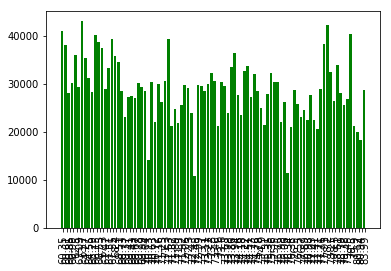

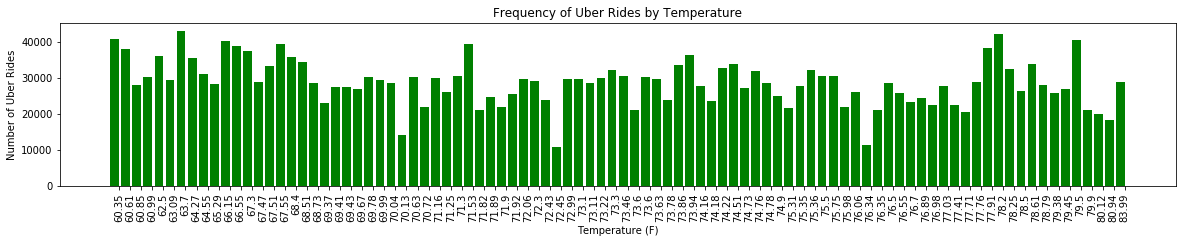

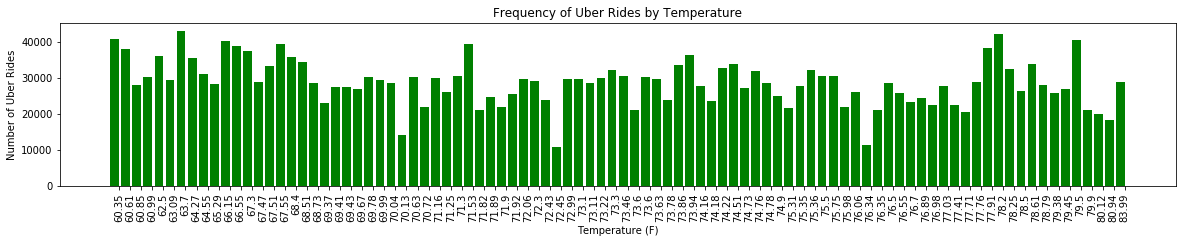

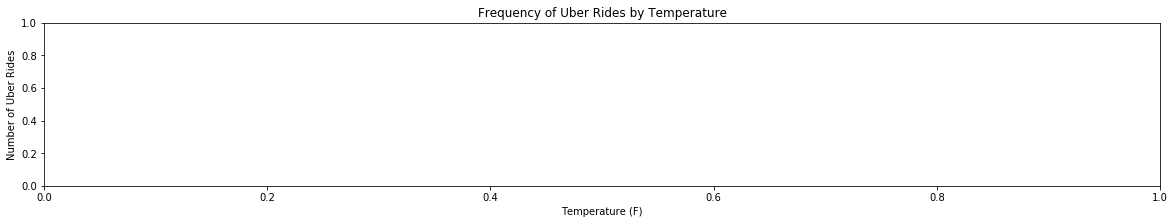

In [75]:
#BAR CHART FOR FREQUENCY OF UBER RIDES VS TEMPERATUE

#merging data on index (date)
merged_uber_weather = weather_data_df.join(uber_counts_df, how='outer')
merged_uber_weather

#rounding temperatue to just 2 decmial places
merged_uber_weather["New_Temp"]=round(merged_uber_weather["New_Temp"],2)

#sorting data by temperatue (assending)
sorted_temp = merged_uber_weather.sort_values("New_Temp")
sorted_temp

#creaing bar chart
x_axis = np.arange(len(merged_uber_weather))
tick_locations = [value+0.4 for value in x_axis]
#tick_locations

barlist=plt.bar(x_axis, sorted_temp["Date and Time"], align="center", color='g')
plt.xticks(tick_locations, sorted_temp["New_Temp"], rotation="vertical")
plt.figure(figsize=(20,3))

# Set a Title and labels
plt.title("Frequency of Uber Rides by Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Uber Rides")
plt.savefig("Frequency of Uber Rides by Temperature2.png")

plt.show()

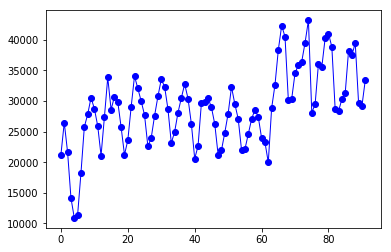

In [67]:
plt.plot(x_axis,merged_uber_weather["Date and Time"], marker = "o", color= "b", linewidth = 1, label = "data 1")
plt.show()

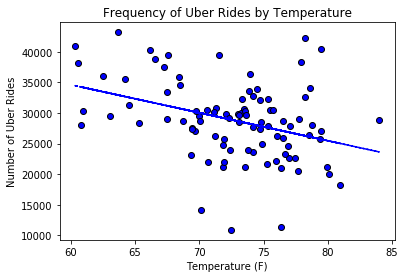

In [99]:
#SCATTER PLOT UBER RIDE FREQENCY VS TEMPERATUE
plt.scatter(merged_uber_weather["New_Temp"], merged_uber_weather["Date and Time"], marker="o", facecolors="b", edgecolors="black")

#plotting line of best fit
(slope, intercept, _, _, _) = linregress(merged_uber_weather["New_Temp"], merged_uber_weather["Date and Time"])
fit = slope * merged_uber_weather["New_Temp"] + intercept
plt.plot(merged_uber_weather["New_Temp"], fit, 'b--')

# Set a Title and labels
plt.title("Frequency of Uber Rides by Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Uber Rides")
plt.savefig("Frequency of Uber Rides by Temperature-SCATTER.png")

plt.show()

In [79]:
sorted_temp = merged_uber_weather.sort_values("New_Temp")
sorted_temp
merged_uber_weather["New_Temp"]=merged_uber_weather.sort_values("New_Temp")
merged_uber_weather
sorted_temp.head(5)

,New_Temp,Date and Time
Dates,,
09/19/2014,60.35,41017
09/25/2014,60.61,38203
09/14/2014,60.85,28122
09/23/2014,60.99,30316
09/16/2014,62.50,36092


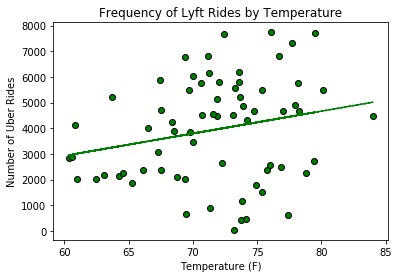

In [101]:
#changing lyft data date and time from string to datetime object
lyft_data_raw ["time_of_trip"] = pd.to_datetime(lyft_data_raw ["time_of_trip"])
lyft_dates=[]
for date in lyft_data_raw ["time_of_trip"]:
    lyft_date = date.strftime("%m/%d/%Y") 
    lyft_dates.append(lyft_date)

#adding dates to lyft dataframe
lyft_data_raw["Dates"] = lyft_dates
lyft_data_raw.head()

#grouping lyft data by dates
lyft_grouped=lyft_data_raw.groupby("Dates")
lyft_grouped.count()

#counting number of uber rides per day
lyft_counts = lyft_grouped["time_of_trip"].count()
lyft_counts

#converting pandas series to dataframe
lyft_counts_df =pd.DataFrame(lyft_counts)
lyft_counts_df.head(5)

#merging lyft data and weather on index (date)
merged_lyft_weather = weather_data_df.join(lyft_counts_df, how='inner')
merged_lyft_weather.head(5)


#SCATTER PLOT UBER RIDE FREQENCY VS TEMPERATUE
plt.scatter(merged_lyft_weather["New_Temp"], merged_lyft_weather["time_of_trip"], marker="o", facecolors="g", edgecolors="black")

(slope, intercept, _, _, _) = linregress(merged_lyft_weather["New_Temp"], merged_lyft_weather["time_of_trip"])
fit = slope * merged_lyft_weather["New_Temp"] + intercept
plt.plot(merged_lyft_weather["New_Temp"], fit, 'g--')


# Set a Title and labels
plt.title("Frequency of Lyft Rides by Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Uber Rides")
plt.savefig("Frequency of Lyft Rides by Temperature-SCATTER.png")

plt.show()

In [82]:
lyft_dates

['09/04/2014',
 '08/27/2014',
 '09/04/2014',
 '09/04/2014',
 '08/28/2014',
 '09/13/2014',
 '09/11/2014',
 '08/27/2014',
 '09/10/2014',
 '09/12/2014',
 '08/28/2014',
 '09/13/2014',
 '09/13/2014',
 '09/04/2014',
 '09/13/2014',
 '09/03/2014',
 '09/04/2014',
 '09/10/2014',
 '08/28/2014',
 '09/13/2014',
 '08/28/2014',
 '08/28/2014',
 '08/27/2014',
 '08/28/2014',
 '09/13/2014',
 '08/27/2014',
 '08/28/2014',
 '09/11/2014',
 '09/11/2014',
 '09/10/2014',
 '08/28/2014',
 '08/27/2014',
 '09/12/2014',
 '08/11/2014',
 '08/09/2014',
 '09/05/2014',
 '09/11/2014',
 '08/11/2014',
 '08/17/2014',
 '08/11/2014',
 '09/20/2014',
 '09/01/2014',
 '08/25/2014',
 '08/12/2014',
 '08/09/2014',
 '08/30/2014',
 '08/15/2014',
 '08/11/2014',
 '09/13/2014',
 '08/29/2014',
 '08/30/2014',
 '09/28/2014',
 '09/12/2014',
 '09/15/2014',
 '08/08/2014',
 '08/15/2014',
 '09/04/2014',
 '09/04/2014',
 '08/30/2014',
 '09/14/2014',
 '08/12/2014',
 '08/11/2014',
 '08/14/2014',
 '08/25/2014',
 '08/11/2014',
 '08/29/2014',
 '08/12/20